In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common imports
import os

import recipe_helper
%aimport recipe_helper

import svm_helper
%aimport svm_helper



In [4]:
# Create plots to include in other slides
rh_ch = recipe_helper.Charts_Helper(visible=False)
_= rh_ch.create_data()
_= rh_ch.create_fit()


# How this course is different

Our belief is that Machine Learning should be taught as a *process* for problem solving.

The following picture will be our agenda; each column is one step in the process.

<img src=images/ML_process.jpg>

In contrast, many approaches focus on a few steps under "Train a model"
- Select a model
- Fit

At two extremes, these approaches either focus on "using an API" or deep math.

This may lead to the ability to construct models but, in our opinion, what distinguishes an adequate Data Scientist from a good one are all the other steps in the process.


But we take an engineer/scientist approach and focus on insight and repeatability (hence, process)
- we view Data Science as an experimental science
- your experiments are implemented via code
- you need to understand enough math to diagnose problems and improve experiments


# Classical ML and Deep Learning

There are two main streams in this course
- "Classical ML"
    - somewhat long history
    - somewhat related to Statistics
- "Deep Learning"
    - really took off after 2010
    - more related to Artificial Intelligence than Statistics
        - experimental versus mathematical
        
This preview is for Classical Machine Learning.

# The big picture
<img src=external/scipy-2018-sklearn/notebooks/figures/ml_taxonomy.png>

# Supervised Learning

Supervised learning is about *informed prediction*.

Let's parse these word
- prediction
- informed

<table>
    <tr>
        <center>Prediction: what digits do these pixels represent ?</center>
    </tr>
<img src=images/mnist_small_test.png>
</table>

**Prediction**:
Given an image that we haven't seem before, determine which digit it represents.

More formally:
- A single input $\x$ is a vector of length $n$, i.e., a collection of $n$ *features*.

- A **predictor** is a map from $\x$ to a class (label) $\hat{\y}$.

The previously unseen image: $\x$ consists of $n=64$ pixels (arranged as an $8 \times 8$ grid.

$\hat{\y}$ is the digit that we will say the image represents.

For now: 
- a class is drawn from a finite set $C$ of potential classes.
- we are describing Classification -- mapping $\x$ to a single class.
- we will extend to Regression: outputs are from a continous universe (e.g., numbers)

An example is a pair $(\x, c)$ of a feature vector $\x$ and a class $c \in C$ (the target).

**Informed prediction** is when the probability of the predictor making a correct prediction
is greater than $\frac{1}{||C||}$.

- Consider a single example $(\x,c)$.

- A simple but naive predictor would map $\x$ to a random $c' \in C$.

The probability of the predictor being correct ($c' = c$) is
$\frac{1}{||C||}$ .



How do we achieve this ?

*Supervised Learning* makes the prediction based on having seen multiple, correctly labelled examples.
- It tries to *generalize*: find some pattern in the examples that is associated with the label.
- Perhaps the individual features (elements of $\x$) are associated with the correct class $c$.

- The aim of Supervised Learning is to create a function (predictor) that maps an $\x$ to the correct $c$.



# Notation

- Supervised Learning involves supplying a number ($m$) of examples.
- Each example is a pair consisting of
    - vector $\x$ consisting of $n \ge 1$ *features* (attributes)
    - scalar (sometimes a vector) $\y$
        - refered to as the*target* value or *label* associated with $\x$

- we use **bold face** to indicate a vector (e.g, $\x$)
- We use superscript $\ip$ to denote an element $i$ of a collection of $m$ examples (e.g., $\x^\ip$)
- We use subscript $j$ to index element $j$ of a vector, e.g., $\x^\ip_j$


- So $\x^\ip$ is

$
  \x^\ip = \begin{pmatrix}
 \x^\ip_1 \\
 \x^\ip_2 \\
  \vdots  \\
 \x^\ip_n
  \end{pmatrix}
$

Each  element of $\x^\ip$ is a "feature"

## Not just numbers !

The features *aren't restricted to be numeric* !

In this course, we will deal with data that is
- numeric
- categorical
- text
- image
- sound (not this course)

Of course, you'll have to encode this data as numbers in order for numerical algorithms to handle them.

## Training set

- The collection of examples used for fitting (training) a model is called the *training set*:

$$ \langle \X, \y \rangle= [ \x^\ip, \y^\ip | 1 \le i \le m ]$$

where $m$ is the size of training set and each $\x^\ip$ is a feature vector of length $n$.

- By seeing many ($m$) pairs of feature vectors and associated labels
we will try to infer the correct label $\y^\ip$ from the features in $\x^\ip$

- $\X$ is an $(m \times n)$ matrix and $\y$ is an $(m \times 1)$ vector of targets.


$
  \X = \begin{pmatrix}
  (\x^{(1)})^T \\
  (\x^{(2)})^T\\
  \vdots \\
  (\x^{(m)})^T \\
  \end{pmatrix} = \begin{pmatrix}
 \x^{(1)}_1 \ldots\x^{(1)}_n \\ 
  \x^{(2)}_1 \ldots\x^{(2)}_n \\ 
   \vdots \\
  \x^{(m)}_1 \ldots\x^{(m)}_n \\
  \end{pmatrix}
$

<table>
    <tr>
        <center>Training set</center>
    </tr>
<img src=images/mnist_small_train.png>
</table>

- We will sometimes add a "constant" feature by setting
$\x^\ip_0 = 1,  0 \le i \le m$
so that the first column of $\x$ is $1$:

$
\X =
\begin{pmatrix}
  1  &\x^{(1)}_1  & \ldots &\x^{(1)}_n \\ 
   1 &\x^{(2)}_1  &\ldots  &\x^{(2)}_n \\ 
   \vdots & \vdots & \ldots &  \vdots \\
   1 &\x^{(m)}_1  &\ldots  &\x^{(m)}_n \\
  \end{pmatrix}
$

- So each of the $m$ rows is an example and each of the $n$ columns is a feature.

## Prediction

- Given training example $\x^\ip$, we construct a function $h$ to predict its label

$\hat{\y}^\ip = h(\x^\ip)$
- The function $h$ will often be parameterized (by $\Theta$) so, for clarity, we should write

$\hat{\y}^\ip = h(\x^\ip; \Theta)$
- We will often drop $\Theta$ for ease of reading.
- Since $h$ is a function, it should also be possible to make a prediction for a vector $\mathbf{x}$ that is **not** part of the training set.
- That is, we are able *generalize* to non-training examples:  to make out of sample predictions

<table>
    <tr>
        <th><center>Training</center></th>
    </tr>
    <tr>
        <td><img src="images/Intro_training_2.jpg"</td>
    </tr>
</table>
​

The key task of Machine Learning is finding the "best" values for parameters $\Theta$.

The process of using training examples $\X$ to find $\Theta$
- is called *fitting* the model
- is solved as an optimization problem (to be described)

<table>
    <tr>
        <th><center>Fitting a model</center></th>
    </tr>
    <tr>
        <td><img src="images/Terminology_training.jpg" ></td>
    </tr>
</table>

<table>
    <tr>
        <th><center>Fitting a Linear Regression model</center></th>
    </tr>
    <tr>
        <td><img src="images/Terminology_training_linear_regr.jpg" ></td>
    </tr>
</table>

**Summary**
- a training example is a pair $(\x^\ip,\y^\ip)$ drawn from training set $\langle \X, \y \rangle$ consisting of 
    - a feature vector $\x^\ip$ of length $n$
    - the associated label (target) $\y^\ip$
    - $\X$ is of dimension $m \times n$
    - $\y$ is dimension $m \times 1$, i.e., target is a single, continous value per example
- predictions are indicated with a "hat:
    - $\hat{\y}^\ip$ is the prediction made given $\x^\ip$ as input
  

# Fundamental assumption of Machine Learning

Our goal is to learn (from training examples) to make a good prediction on a never before seen *test* example.

A necessary condition is that the training examples are representative of the future test examples we will encounter.

Let's imagine that there is some true (but unknown) distribution $\pdata$ of feature/label pairs $(\x, \y)$.

In order to learn, we must assume
- That each test example $(\x, \y)$ is drawn from $\pdata$
- The *training examples* are a sample drawn from $\pdata$.

We sometimes call the training data an *empirical* distribution -- it is just a sample, not the "true" distribution.



That is: our model can only generalize based on training examples
- The training examples need to be representative of unseen examples in the wild in order to generalize well
- Larger training sets are preferred as they may be more representative of the true $\pdata$
    - They should also be diverse
    
If the test example $\x$ is $not$ from $\pdata$, the model is unconstrained in its prediction.

# Making it concrete: Let's predict !

Let's load a dataset to make these concepts concrete

In [5]:
import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()
X_digits,  y_digits = clh.load_digits()


- Let's see what $m$ (number of examples), $n$ (number of features) are

In [6]:
import numpy as np

print("m={m:d} training examples".format(m=X_digits.shape[0]))
print("n={m:d} features per example".format(m=X_digits.shape[1]))
targets = np.unique(y_digits)
targets.sort()

print("{nc:d} classes: {c:s}".format(nc=len(targets), c=", ".join( [ str(t) for t in targets ]) ) )

m=1797 training examples
n=64 features per example
10 classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [7]:
# Across the features of all examples: what is the min and the max ?
# Let's look at the feature vector for example at index ex_num
ex_num = 0
print("\nExample {n:d}, range({mn:2.2f}, {mx:2.2f}):\n\t ".format(n=ex_num, 
                                                              mn=X_digits.min(), mx=X_digits.max()
                                                             ),
      X_digits[ex_num,:]
     )


Example 0, range(0.00, 1.00):
	  [0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]


- The dataset contains a number of examples.

    - Each example $\x^\ip$ is a vector of 64 features, which are numbers in the range $[0,1]$
    - The target $y^\ip$ is a digit in the range $[0,9]$

- In other words: the examples are encodings of images with labels that indicate what the image is.
    

Since the examples are grey scale values, we can re-arrange them into a square grid and plot:

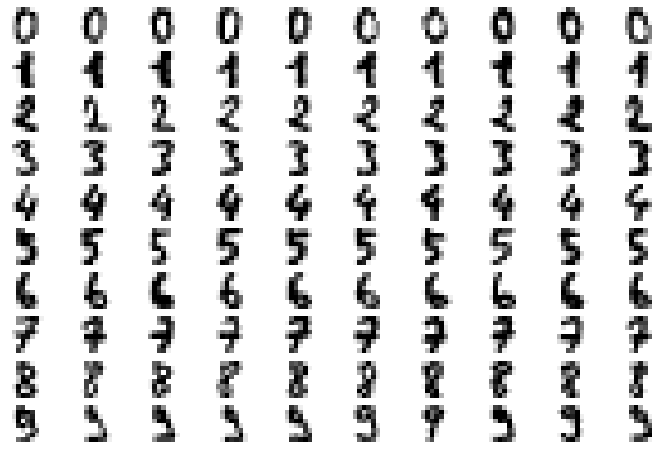

In [8]:
fig, axs = clh.plot_digits(X_digits,  y_digits)

- Our problem is to take an unknown $\x$ and map it (predict) to a label in the range $[0,9]$.

- This is a *classification* problem as our predictions are from a finite set.

KNN score: 0.990000
LogisticRegression score: 1.000000


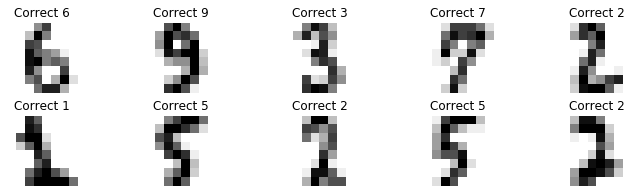

In [9]:
Xd_train, Xd_test, yd_train, yd_test, models = clh.fit_digits(X_digits, y_digits)

_= clh.predict_digits(models["knn"], Xd_test[:10], yd_test[:10])

- How would **you** predict a label for an image, given the 64 pixel values ?

- We will use a very simple (and inefficient) algorithm called *K Nearest Neighbors (KNN)*.

## Template matching

$\newcommand{\vc}{\mathbf{v}_{(c)}}$

- One approach to Classification is to match our input vector $\x$ against a *template*:
(a vector of similar length) whose class is known.

- With one template $\vc$ for each class $\c \in C$, we could classify $\x$ as being in the class $c'$
whose template was "closest" to $\x$.

- We need a similarity measure that maps $\x$ and $\vc$ to a number such that
larger means more similar.


# Our first predictor: K Nearest Neighbors (KNN)

- Here's one of the simplest Machine Learning algorithms, that leverages template matching.
- In this case, the templates are the feature vectors of the training set.

- Use the similarity measure to find the $K$ training examples closest to $\x$; 

- Predict the class that appears most frequently among these $K$ examples.

- Here is our predictor function, given *test* input $\x$:
    - For each training example $\x^\ip$, compute the similarity $s^\ip$ of $\x$ to $\x^\ip$
    - Let $S_K$ be the set of $K$ training examples $i_1, i_2, \ldots, i_K$with greatest similarity to $\x$
        - $Y = [ \y^{(j)}  | \ j \in S_K ]$ be the classes associated with these closest examples
    - Let $\text{count}_c$ be the number of elements of $Y$ that are equal to class $c, c \in C$.
    - Predict class $c'$, with the greatest $\text{count}_{c'}$

<table>
    <tr>
        <th><center>KNN algorithm</center></th>
    </tr>
    <tr>
        <td><img src="images/KNN_algo.jpg" width=1000</td>
    </tr>
</table>
​

Here's an illustration of KNN in action:
- training example
$$\x^\ip = [ \x_1, \x_2 ], \y^\ip \in \{ 0, 1 \}$$
is plotted as a colored dot, with the color corresponding to $\y ^\ip$
- we form many test (non-training) examples by creating arbitrary pairs of $\x_1, \x_2$ values in a grid
    - predict for each, fill the grid with a color corresponding to the predicted class

The line separating colors (classes) is called the *separating* or *decision* boundary.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifiers =  [ ("knn (k=1)", KNeighborsClassifier(1)),
                 ("knn (k=3)", KNeighborsClassifier(5))
               ]
svmh = svm_helper.SVM_Helper()
_= svmh.create_kernel_data(classifiers=classifiers)      
fig, axs = svmh.plot_kernel_vs_transform(show_margins=False)
plt.close()

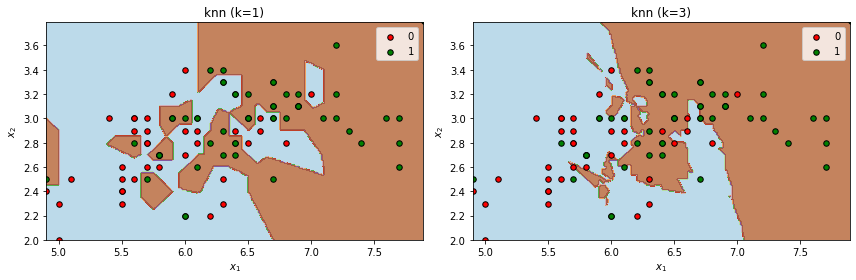

In [11]:
fig

- KNN operates under the assumption (Manifold Hypothesis) that if two vectors are similar, they have the same class.

- If $K=1$, the predictions are highly sensitive to the training examples; increasing $K$ may increase
the prediction accuracy.
  

Although simple, can you spot the drawback to KNN ?

$
\Theta = \X
$

- The size of $\Theta$ (the number of parameters) is proportional to
    - the size of the training set: $m * n$
    - ideally: $m$ is very large, so $\Theta$ is big
    
**Note**

- *Always* count the number of parameters (size of $\Theta$)
- You may be surprised how many you are estimating in comparsion to the amount of training data

  

KNN is so simple it's almost embarassing to call it Machine Learning.
But it does illustrate the key steps
- the basis of Supervised Learning are training examples
    - the more the better
- the training examples are used to *fit* a predictor
    - we will learn many predictors (models) in this course
- the features of the examples are the key to prediction

- KNN did not make intelligent use of the features: it merely  memorized the $m$ examples.

    - That is, it used $m$ templates each of size $n$ so $|\Theta| = m*n$.

- We will see that many ML algorithms, both Classic (e.g., Regression) and Deep Learning,
are based on *solving* for $\Theta$ -- finding small templates that are effective
for prediction.

- A more intelligent basis for prediction would include:
    - finding one (or more) features that are predictive
    - finding relationships among features that are predictive
    - find a subset of features that is *common across all examples* in a class.



- Another issue: perhaps we are using the wrong features ?
    - are $n = 64$ raw pixels the best representation of the input (and template) for learning ?
    - would higher level features (e.g., groups of pixels that form horizontal/vertical lines) be more efficient ?


- This is called Data Transformation or Feature Engineering and will be key concept.

# Fitting a predictor (training a model)

- As simple as KNN is, it has far less mathematical basis than most ML algorithms.

- To be more formal, a predictor is a function of feature vectors $\x$ whose behavior
is parameterized by $\Theta$.
    - terminology: also called an *estimator*, *fitted model*

- A *cost or loss function*  measures how well the predictor performs
on the training set, given  $\Theta$.

- Fitting (or training) the predictor: solve for the $\Theta$
that minimizes the cost function.

**Note** The loss function is relative to the *training* set
-  it is usually similar, but not
identical, to the Performance Measure that quantifies how well the predictor peforms
out of sample (e.g., on the Test or Validation set).

## Loss/Cost, Utility

- The prediction $\hat{\y}^{(i)}$ for example $\x^\ip$ is perfect if it matches the true label $\y^\ip$

$ \hat{\y}^\ip = \y^\ip$

- Perfection  is hard (at least at first) so we need a measure for "how far off" the prediction is.

- We will call the distance between $\hat{\y}^{(i)}, y^\ip$ the *Loss* (or *Cost*) for example $i$:

$$
\loss^\ip_\Theta =  L( \;  h(\x^\ip; \Theta),  \y^\ip \;) = L( \hat{\y}^\ip , \y) 
$$

where $L(a,b)$ is a function that is $0$ when $a = b$ and increasing as $a$ increasingly differs from $b$.

Two common forms of $L$ are Mean Squared Error (for Regression) and Cross Entropy Loss (for classification).

The Loss for the entire training set is simply the average (across examples) of the Loss for the example

$$
\loss_\Theta  = { 1\over{m} } \sum_{i=1}^m \loss^\ip_\Theta
$$

<table>
    <tr>
        <th><center>Training Example</center></th>
    </tr>
    <tr>
        <td><img src="images/Intro_training.jpg"</td>
    </tr>
</table>
​

The best (optimal) $\Theta$ is the one that minimizes the Average (across trainng examples) Loss

$$
\Theta^* = \argmin{\Theta} { \loss_\Theta }
$$

Whereas Loss describes how "bad" our prediction is, we sometimes refer to the converse -- how "good" the prediction is.

We call the "goodness" of the prediction  the *Utility* $U_\Theta$.

So we could state the optimization objective either as
"minimize Cost" or "maximize Utility".

By convention, the DL optimization problem is usually framed as one of minimization (of cost or loss) 
rather than maximization of utility.

Since Cost is inversely related to Utility, you will sometimes see
the minimization objective written as
"minimize -1 times Utility".

So be forewarned that you will often see Loss function with leading "negation" signs.

### Creating Loss functions is a key part of Deep Learning

As you will come to see, particularly for Deep Learning, the essence of many problems is in creating a Loss Function that captures the objective of your problem.

This is  far from a trivial part of the process.

## Optimization: Minimize Cost/Loss, Maximize Utility

- The goal of fitting/training is to solve for the $\Theta$ that minimizes the training set loss 
$L_\Theta$ (or conversely, maximizes the Utility $U_\Theta$.

- The method for finding $\Theta$ is called optimization.

- There is one optimization method that we will study in depth: Gradient Descent.

- We can use this in Classical ML but it will become a key tool once we move on to Deep Learning.

- One focus of this course will be variations on Gradient Descent.

- The difficulty of finding a good "solution" to a problem is
    - creating a loss function that describes your objectives, which often have multiple aspects
    - having a large and diverse set of training examples to estimate $\Theta$.

- Many packages have a method "fit" that takes the training set and performs the optimization.

- These packages usually create a "model" object (containing the $\Theta$ among other things)

- We use *predictor* and *model* as synonyms.

# The dot product: key tool of linear models

- The "dot product" (special case of inner product) is one function
that often appears in template matching

- It measures the
similarity of two vectors

$
\mathbf{v} \cdot \mathbf{v}' = \sum_{i=1}^n \mathbf{v}_i \mathbf{v}'_i
$

- As a similarity measure (rather than as a distance) high dot product means "more similar".

- There are several intuitions for the dot product

- The dot product is maximized  when large (resp., small) values appear in similar positions in both vectors
  - this becomes evern more obvious if we $0$-center both vectors such that "small" values become negative
  - this looks like the statistical formula for covariance
    - if we normalize both vectors to unit length, then this looks like correlation

 - Geometric.  Let $\alpha$ be the angle between vectors.
    - $\mathbf{v} \cdot \mathbf{v}' =  || \mathbf{v} || *  || \mathbf{v}' || * \cos(\alpha)$
    - $\mathbf{v} \cdot \mathbf{v}' \over{ || \mathbf{v} || *  || \mathbf{v}' ||}$ is called the cosine similarity
      - similarity between normalized vectors
    - similarity is maximized when $\alpha = 0$, that is $v$ and $v'$ are coincident (but perhaps different lengths)
    - similarity is $0$ when $v, v'$ are orthogonal
    - similarity is negative when $v, v'$ point in different directions

- We can generalize dot product to higher dimensions by taking the sum of element-wise multiplication (or simply by first flattening both vectors to one dimension)

- We will see the dot product appear repeatedly, particularly in Deep Learning.

# Summary

- Machine Learning is a *process* that involves multiple steps
    - It is *not* just learning to use various models (predictors)
    - We will emphasize the process as much as the algorithms
- Supervised Machine Learning depends on the availability of data
    - obtaining, cleaning, augmenting data is important
- An example is a collection of "features"
    - finding/creating/interpretting features is the key skill of a Data Scientist
        - which features are important 
        - how do features interact
    - sometimes features are missing or too low level
    - a key skill is creating features than enable learning
    ML


- A key part of Machine Learning is stating an optimization objective that captures your goal
    - not always obvious

<img src=images/ML_process.jpg>

In [12]:
print("Done")

Done
